In [20]:
!uv pip install scikit-learn
!uv pip install matplotlib
!uv pip install seaborn

Audited 1 package in 27ms
Audited 1 package in 8ms
Audited 1 package in 13ms


In [21]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [22]:
# File path
CSV_FILE = "data_source/weather_data.csv"

In [23]:
# Check if the file exists
if not os.path.exists(CSV_FILE):
    raise FileNotFoundError(f"{CSV_FILE} not found! Make sure weather data is collected.")

In [24]:
# Load dataset
df = pd.read_csv(CSV_FILE)

In [25]:
# Display first few rows
df.head()

,city,temperature,humidity,pressure,wind_speed,rainfall,timestamp
0,kathmandu,20.12,30,1010,3.6,0.0,2025-02-11 17:53:46.186045
1,texas,5.97,93,1007,0.0,0.0,2025-02-11 17:53:55.174385
2,dallas,5.61,93,1010,3.6,0.0,2025-02-11 17:54:03.135454
3,lalitpur,20.21,30,1010,3.6,0.0,2025-02-11 17:54:21.839509
4,bhaktapur,20.08,30,1010,3.6,0.0,2025-02-11 17:54:29.952950


In [26]:
# Drop missing values
df.dropna(inplace=True)

In [27]:
# Convert rainfall into binary classification (1 = Rain, 0 = No Rain)
df["rainfall"] = (df["rainfall"] > 0).astype(int)

In [28]:
# Select features (X) and target variable (y)
X = df[["temperature", "humidity", "pressure", "wind_speed"]]
y = df["rainfall"]

In [29]:
# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

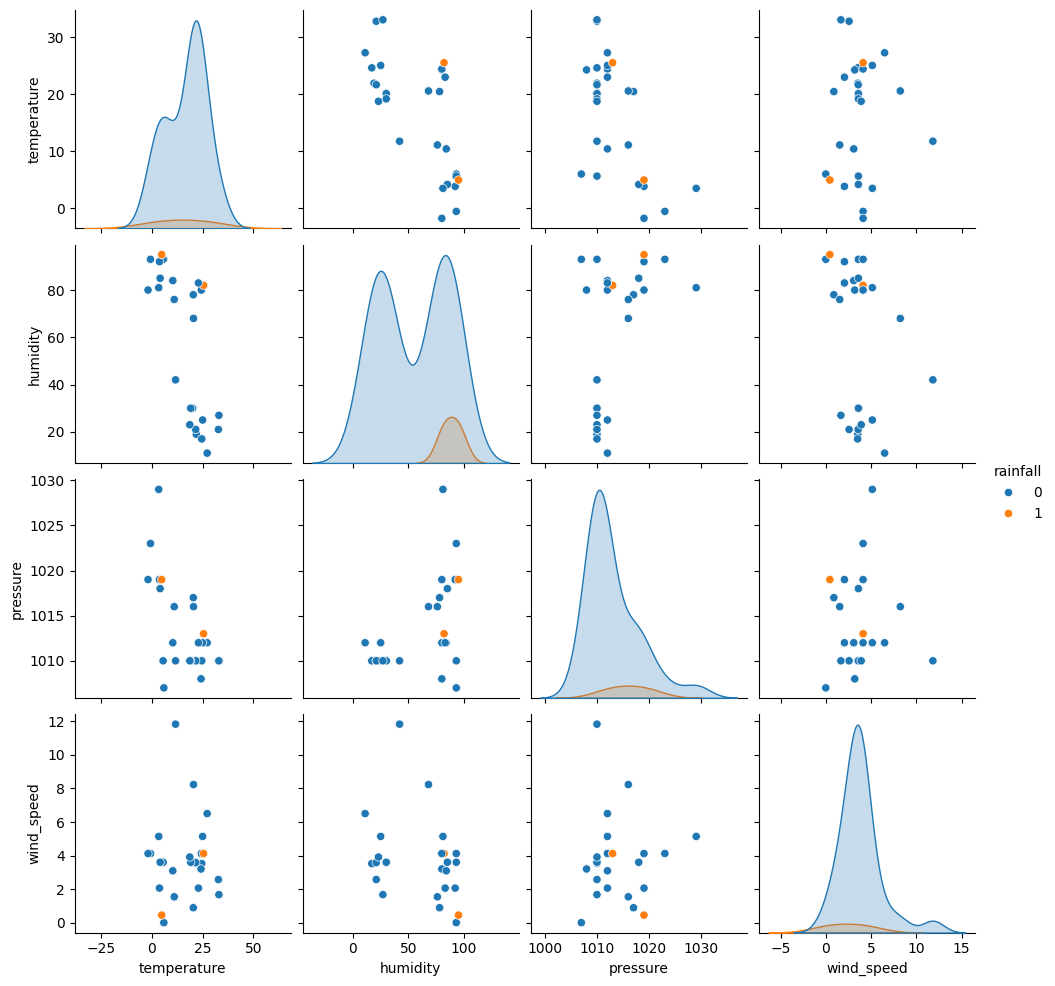

In [31]:
# Show data distribution
sns.pairplot(df, hue="rainfall")
plt.show()

In [32]:
# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [33]:
# Predict on test data
y_pred = model.predict(X_test)

In [34]:

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

/home/samuel/weather_forecast/weather_forecast_backend/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/samuel/weather_forecast/weather_forecast_backend/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/samuel/weather_forecast/weather_forecast_backend/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavio

In [35]:
# Display evaluation metrics
print(f"Model Performance:\nAccuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1-score: {f1:.2f}")

Model Performance:
Accuracy: 1.00
Precision: 0.00
Recall: 0.00
F1-score: 0.00


In [36]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

/home/samuel/weather_forecast/weather_forecast_backend/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


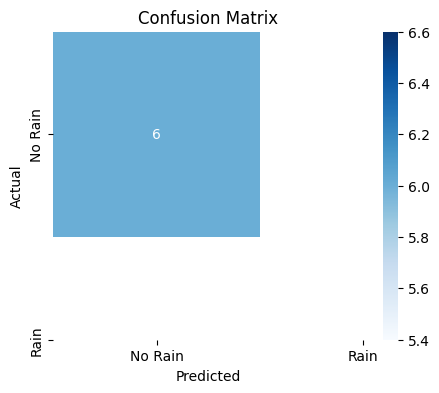

In [37]:
# Plot heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["No Rain", "Rain"], yticklabels=["No Rain", "Rain"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [38]:
MODEL_FILE = "data_source/rainfall_model.pkl"

# Save model and scaler
with open(MODEL_FILE, "wb") as f:
    pickle.dump((scaler, model), f)

print(f"Model saved successfully as {MODEL_FILE}")

Model saved successfully as data_source/rainfall_model.pkl
